# Boundary and initial conditions 
To solve the diffusion equation, you need to specify the distribution $P(x|0)$ in the beginning -- **the initial condition** -- and what happens at the ends of the range your are studying -- **the boundary conditions**.

Boundary conditions for diffusion problems are typically of two forms:

 * reflecting: impenetrable wall
 * absorbing: everything that passes the boundary is removed
 
![image.png](figures/diffusion_boundary.png)

As initial condition, we will consider a case where the left half of our domain is filled and the right half is empty. 

![image.png](figures/diffusion_initial.png)

### Numerical solution

While it is possible to solve the diffusion equation with absorbing or reflecting boundary conditions exactly, we fill focus here on numerical solution:

left/right rates: 499.9999999999999 499.9999999999999


Text(0.5, 0, 'position  [um]')

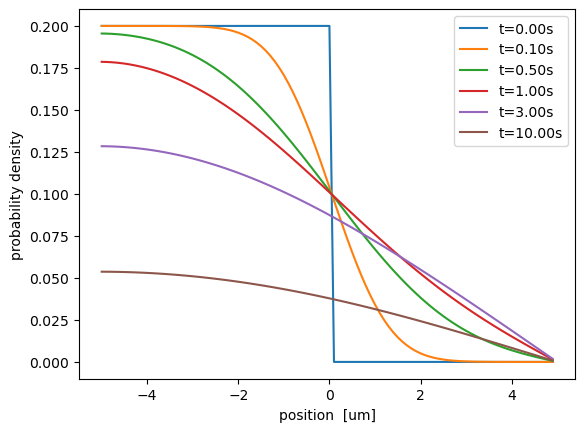

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define the derivative
def dpdt(p, r, l):
    dp = np.zeros_like(p)
    dp[1:-1] += r*(p[:-2] - p[1:-1])  # jump to the right
    dp[1:-1] += l*(p[2:] - p[1:-1]) # jump to the left
    dp[0] += l*p[1] - r*p[0]     # reflecting boundary (only right jump at xmin)
    # COMMENT OUT ONE OR THE OTHER OF THE FOLLOWING LINES
    # TO SWITCH BETWEEN ABSORBING OR REFLECTING BOUNDARY CONDITIONS
    # dp[-1] += r*p[-2] - l*p[-1]  # reflecting boundary (only left jump at xmax)
    dp[-1] += r*p[-2] - (r+l)*p[-1]  # absorbing boundary (left AND right jump at xmax)
    return dp

# define parameters and left/right hopping rates
D = 5       # um^2/s
v = 0.0
dx = 0.1    # if dx is too small, numerical solution is unstable
dt = 0.0002  # if dt is too large, numerical solution is unstable

r = D/dx**2 + v/dx/2
l = D/dx**2 - v/dx/2
print("left/right rates:", r, l)

# set up the initial condition
xmax = 5    # um
x = np.arange(-xmax,xmax,dx)
p = np.zeros_like(x)
p[x<0] = 1/xmax   # density 1/xmax for x<0, density 0 for x>0

# solve the equation using the forward Euler method
tmax = 1
t=0
for tmax in [0,0.1, 0.5, 1,3, 10]:
    while t<tmax:
        p += dt*dpdt(p, r, l)
        t += dt
    # plot the result
    plt.plot(x,p, label=f"t={t:1.2f}s")

plt.legend()
plt.ylabel('probability density')
plt.xlabel('position  [um]')

### Reflecting initial condition

 * The initial step function broadens and becomes flat at 1/2 the height. 
 * Total area under curve is constant.
 * Time to spread a distance $x_{max} = 5\mu m$ is about $t=3$s. This is expected given that $2Dt = 30\mu m^2 \approx x_{max}^2$

### Absorbing initial conditions

 * At the absorbing initial condition, the probability distribtion goes linearly to 0
 * The total amount of probability left gradually decreases.

#### Dig deeper
 * Change `xmax` and explore how the time scale of equilibration changes!
 * Explore the steady state behavior of the solution with reflecting boundaries with non-zero $v$!
 * For an absorbing boundary at the right end, plot the amount of probability ($\sum_x p(x|t)$) that is left as a function of time. 
 * Modify the code such that both boundaries are absorbing.
 * Change the initial condition.